In [1]:
#import block
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from glob import glob
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from re import findall as find
import seaborn as sns

In [2]:
folderrose="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/01_Jan/19012023_K4K8onecell_G/Roseplot/"
rosefiles=glob(folderrose+"R*.csv")

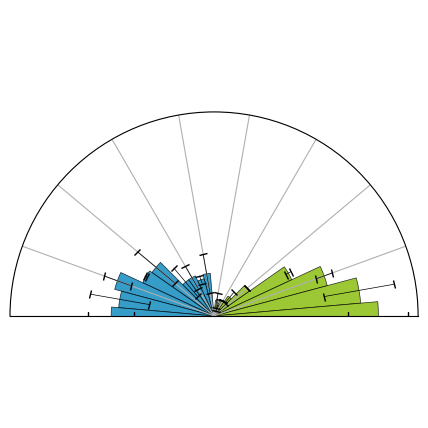

In [4]:
angles1control=pd.read_csv(rosefiles[0])["Angle"]
angles2control=pd.read_csv(rosefiles[1])["Angle"]+30
angles1MO=pd.read_csv(rosefiles[2])["Angle"]
angles2MO=pd.read_csv(rosefiles[3])["Angle"]
angles1control=np.where(angles1control>90,180-angles1control,angles1control)
angles2control=np.where(angles2control>90,180-angles2control,angles2control)
angles2control=np.where(angles2control<0,angles2control+180,angles2control)
angles1MO=np.where(angles1MO>90,180-angles1MO,angles1MO)
angles2MO=np.where(angles2MO>90,180-angles2MO,angles2MO)
angle_bins = np.linspace(0, 90, 10)
hist1control, bin_edges1control = np.histogram(angles1control, bins=angle_bins)
hist2control, bin_edges2control = np.histogram(angles2control, bins=angle_bins)
hist1MO, bin_edges1MO = np.histogram(angles1MO, bins=angle_bins)
hist2MO, bin_edges2MO = np.histogram(angles2MO, bins=angle_bins)
histerror=np.std([hist1control,hist2control],axis=0)
mohisterror=np.std([hist1MO,hist2MO],axis=0)
histcontrol=np.mean([hist1control,hist2control],axis=0)
histMO=np.mean([hist1MO,hist2MO],axis=0)
bin_edges=np.deg2rad(bin_edges1control)
mobin_edges=np.deg2rad(bin_edges1MO)
fig,ax =plt.subplots(figsize=(7,5.3), subplot_kw={'projection': 'polar'})  
bars=ax.bar(bin_edges[:-1][::-1], histcontrol, width=bin_edges[1]-bin_edges[0], edgecolor='black',
            alpha=0.8, linewidth=0.5,  color='#83bb03', label='Control')
ax.errorbar(bin_edges[:-1][::-1], histcontrol, yerr=histerror, fmt='none', color='black', capsize=3,linewidth=0.5) 
mobars=ax.bar(mobin_edges[1:]+1.570796327, histMO, width=mobin_edges[1]-mobin_edges[0], edgecolor='black',
               alpha=0.8, linewidth=0.5,  color='#0383bb', label='MO')
ax.errorbar(mobin_edges[1:]+1.570796327, histMO, yerr=mohisterror, fmt='none', color='black', capsize=3,linewidth=0.5)  
# Customize the plot
ax.set_theta_zero_location('E')  # Set 0 degrees to the right (East)
ax.set_theta_direction(1)
ax.set_xticks(np.deg2rad(np.linspace(0, 180, 10)))
ax.set_xticklabels(["" for angle in np.linspace(0, 180, 10)])
ax.set_thetamin(0)  # Set the minimum theta to 0 degrees
ax.set_thetamax(180)  # Set the maximum theta to 180 degrees
ax.set_yticks([])  # Do not show y gridlines
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure4/Roseplot/"+"Roseplotkeratincontrol.png", dpi=300,transparent=True, bbox_inches='tight')
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure4/Roseplot/"+"RoseplotkeratinMO.pdf", dpi=300,transparent=True, bbox_inches='tight')
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure4/Roseplot/"+"RoseplotkeratinMO.svg", dpi=300,transparent=True, bbox_inches='tight')
plt.show()

In [81]:
hist2control

array([10, 14, 18, 33, 26, 33, 27, 24, 28], dtype=int64)

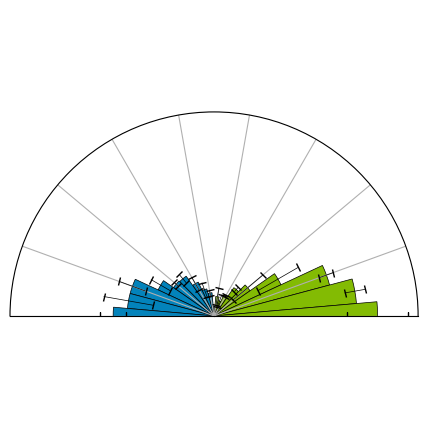

In [5]:
yslmofolder="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/03_Mar/08032023_K4K8Yslinj/Orientation/Roseplot/"
krtyslrosefiles=glob(yslmofolder+"R*.csv")
angles1ysl=pd.read_csv(krtyslrosefiles[0])["Angle"]
angles2ysl=pd.read_csv(krtyslrosefiles[1])["Angle"]
angles1ysl=np.where(angles1ysl>90,180-angles1ysl,angles1ysl)
angles2ysl=np.where(angles2ysl>90,180-angles2ysl,angles2ysl)
angles1moysl=pd.read_csv(krtyslrosefiles[2])["Angle"]
angles2moysl=pd.read_csv(krtyslrosefiles[3])["Angle"]
angles1moysl=np.where(angles1moysl>90,180-angles1moysl,angles1moysl)
angles2moysl=np.where(angles2moysl>90,180-angles2moysl,angles2moysl)
yslangle_bins = np.linspace(0, 90, 10)
yslhist1, yslbin_edges1 = np.histogram(angles1ysl, bins=yslangle_bins)
yslhist2, yslbin_edges2 = np.histogram(angles2ysl, bins=yslangle_bins)
yslhist1mo, yslbin_edges1mo = np.histogram(angles1moysl, bins=yslangle_bins)
yslhist2mo, yslbin_edges2mo = np.histogram(angles2moysl, bins=yslangle_bins)
yslhisterror=np.std([yslhist1,yslhist2],axis=0)
yslmohisterror=np.std([yslhist1mo,yslhist2mo],axis=0)
yslhistcontrol=np.mean([yslhist1,yslhist2],axis=0)
yslhistMO=np.mean([yslhist1mo,yslhist2mo],axis=0)
yslbin_edges=np.deg2rad(yslbin_edges1)
yslmobin_edges=np.deg2rad(yslbin_edges1mo)
fig,ax =plt.subplots(figsize=(7,5.3), subplot_kw={'projection': 'polar'})
bars=ax.bar(yslbin_edges[:-1][::-1], yslhistcontrol, width=yslbin_edges[1]-yslbin_edges[0], edgecolor='black', linewidth=0.5,  color='#83bb03', label='Control')
ax.errorbar(yslbin_edges[:-1][::-1], yslhistcontrol, yerr=yslhisterror, fmt='none', color='black', capsize=3,linewidth=0.5)
mobars=ax.bar(yslmobin_edges[1:]+1.570796327, yslhistMO, width=yslmobin_edges[1]-yslmobin_edges[0], edgecolor='black', linewidth=0.5,  color='#0383bb', label='MO')
ax.errorbar(yslmobin_edges[1:]+1.570796327, yslhistMO, yerr=yslmohisterror, fmt='none', color='black', capsize=3,linewidth=0.5)
# Customize the plot
ax.set_theta_zero_location('E')  # Set 0 degrees to the right (East)
ax.set_theta_direction(1)
ax.set_xticks(np.deg2rad(np.linspace(0, 180, 10)))
ax.set_xticklabels(["" for angle in np.linspace(0, 180, 10)])
ax.set_thetamin(0)  # Set the minimum theta to 0 degrees
ax.set_thetamax(180)  # Set the maximum theta to 180 degrees
ax.set_yticks([])  # Do not show y gridlines
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure4/Roseplot/"+"Roseplotkeratinyslcontrol.png", dpi=300,transparent=True, bbox_inches='tight')
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure4/Roseplot/"+"RoseplotkeratinyslMO.pdf", dpi=300,transparent=True, bbox_inches='tight')
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure4/Roseplot/"+"RoseplotkeratinyslMO.svg", dpi=300,transparent=True, bbox_inches='tight')
plt.show()

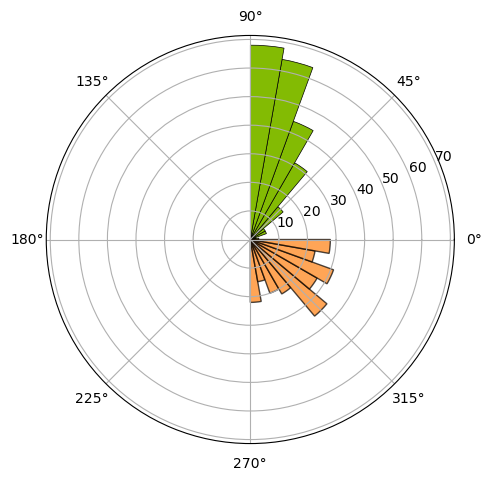

In [7]:
angles=pd.read_csv(rosefiles[0])["Angle"]
moangles=pd.read_csv(rosefiles[2])["Angle"]
angles = np.where(angles > 90, 180 - angles, angles)
angles = np.where(angles < 0, angles + 180, angles)
moangles = np.where(moangles > 90, 180 - moangles, moangles)
moangles = np.where(moangles < 0, moangles + 180, moangles)
angle_bins=np.linspace(0,90,10)
hist, bin_edges = np.histogram(angles, bins=angle_bins)
mohist, mobin_edges = np.histogram(moangles, bins=angle_bins)
# Create the rose plot
fig, ax = plt.subplots(figsize=(7,5.3), subplot_kw=dict(polar=True))
# Convert bin edges to radians
bin_edges_rad = np.deg2rad(bin_edges)
mobin_edges_rad = np.deg2rad(mobin_edges)
# Create the bar plot in polar coordinates
bars = ax.bar(bin_edges_rad[:-1], hist, width=np.diff(bin_edges_rad), align='edge', edgecolor='black',color='#83bb03', linewidth=0.5)
mobars= ax.bar(mobin_edges_rad[:-1]-1.570796327, mohist, width=np.diff(mobin_edges_rad), align='edge', edgecolor='black', alpha=0.7,color='#ff7f0e', label='90-180°')
# Customize the plot
ax.set_theta_zero_location('E')  # Set 0 degrees to the right (East)
ax.set_theta_direction(1) 

In [26]:
bin_edges

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])